# **STINTSY Machine Learning Project**

## **Introduction to the problem/task and dataset**

### **1. Problem Statement**
*  The dataset's **primary goal** is to understand and predict productivity performance by focusing on the output of teams involved in the garments manufacturing industry. Given the labor-intensive nature of the garment manufacturing industry and the numerous productivity factors that affect it, this dataset is useful for examining these aspects and forecasting productivity results.

### **2. Target Task**
*   Since **actual_productivity**, the main feature of interest, is a continuous variable with a range of 0 to 1, a regression task would be suitable in this case. Our goal is to use temporal and team-based factors in determining the actual productivity of an instance. The variables we will be using from the dataset are **day**, **quarter**, **department**, **no_of_style_change**, and **no_of_workers**. Selecting these variables allows the model to capture relevant temporal trends and team-specific factors that likely impact productivity. This ensures a comprehensive approach, factoring in both scheduling patterns and team dynamics that drive actual productivity outcomes.


## **Description of the dataset**



#### **Dataset Description**
* The garment manufacturing industry gathers the garment dataset to assess teams' productivity. It records precise time data on day-to-day operations, team structures, and production rates. The manually compiled information, which industry professionals have verified, is intended to support productivity monitoring, analysis, and forecasting in the apparel manufacturing sector.

#### **Data Collection Process**
* The dataset was **gathered by hand** and verified by professionals in the field. Although manual data collection suggests high dependability, it may also add biases or human error, which could affect the conclusions' precision and generalizability.

#### **Dataset Structure**
* **Rows**: Every row represents a productivity instance for a particular team that manufactures garments on a certain day.
* **Columns**: The dataset contains 15 columns, representing different attributes related to productivity.

#### **Dataset Composition**
* **Number of Instances**: 1,197 observations.
* **Number of Features**: 15 features in total, each capturing an aspect relevant to garment manufacturing productivity.

#### **Feature Descriptions**
* **date**: Date of the recorded instance in MM-DD-YYYY format.
* **quarter**: Month divided into four quarters.
* **department**: Department associated with the instance, either sewing or finishing.
* **day**: Day of the week for the recorded instance.
* **team**: Team number associated with the observation.
* **targeted_productivity:** Targeted productivity level set by authorities for each team per day.
* **smv (Standard Minute Value)**: Time allocated for specific tasks.
* **wip (Work in Progress)**: Count of unfinished items; has missing values.
* **over_time:** Overtime (in minutes) recorded for each team.
* **incentive**: Financial incentives provided to motivate productivity.
* **idle_time**: Time during which production was interrupted.
* **idle_men**: Number of workers idle due to interruptions.
* **no_of_style_change**: Count of style changes for the products.
* **no_of_workers**: Total workers in each team.
* **actual_productivity**: Actual productivity achieved, which ranges from 0 to slightly over 1.

## **List of Requirements**
List all the Python libraries and modules that you used.
pandas

## **Data preprocessing and cleaning**

### **Imports**

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### **Loading the Dataset** <br>


We will load the dataset using `pandas`

In [ ]:
# Load the data
data = pd.read_csv('/content/garments.csv')

### **Overview of the Dataset** <br>


This overview provides the first **5 instance** of the dataset, the overall information such as the number of entries and columns, and the data type per column

In [ ]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


### **Identifying Relevant Features** REMOVE?


Create an array list containing the complete features of the dataset.

In [ ]:
# complete_features = ['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

To idenfity relevant features for the prediction, we will first perform correlation for each feature against the something/pinepredict,

preprocess the data first before performing the correlation shits, kapag may trend, do not drop the features, kapag walang trend, drop the features mf

This overview provides the first **5 instance** of the dataset, the overall information such as the number of entries and columns, and the data type per column

In [ ]:
# Display overview of data
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


****

In [ ]:
# Show basic information about the dataset (data types, non-null counts)
print("\nDataset Information:")
display(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-nu

None

### **Checking for missing values** <br>


As a first pre-processing step, we will check if there are `columns` or `features` that have missing values

In [ ]:
# Check for missing values
print("\nMissing Values in Each Column:")
display(data.isnull().sum())


Missing Values in Each Column:


,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


Since the wip variable has missing values and amounting to almost half the dataset, we will fill the missing

Let's visualize the distribution of the wip variable

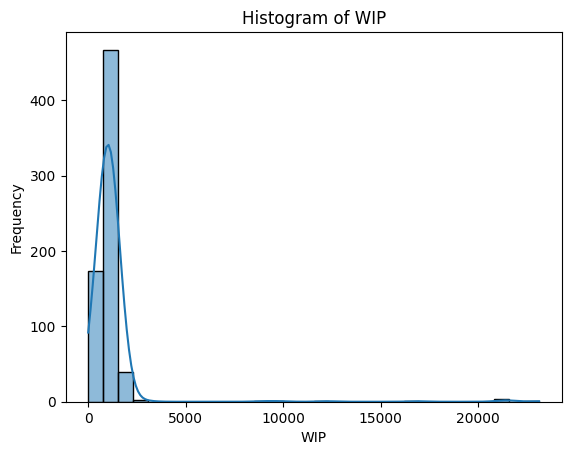

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['wip'], kde=True, bins=30)  # Replace 'data' and 'wip' with your dataset and column name
plt.title('Histogram of WIP')
plt.xlabel('WIP')
plt.ylabel('Frequency')
plt.show()


Since the data is skewed, we will use the median to fill in the missing values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data['wip'] = imputer.fit_transform(data[['wip']])
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


### **Checking for duplicate instances in our dataset**

We need to ensure that there are no redundant entries that could bias your analysis or model results.

In [ ]:
# Check for duplicates and display the count of duplicate rows
duplicate_rows = data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Display the duplicate rows
if duplicate_rows.sum() > 0:
    print("\nDuplicate Rows:")
    display(data[duplicate_rows])


Number of duplicate rows: 0


Since there are no duplicate data, we don't need to do anything for it

### **Handling Data Inconsistencies**

In [ ]:
# Display the unique values of the column: department
print(data['department'].unique())

['sweing' 'finishing ' 'finishing']


In the `department` column, our data is supposed to have either **sewing** or **finishing** only. However, the 'sewing' value has incorrect spelling, and there is an extra space in some 'finishing' values. Therefore, we need to handle them

In [ ]:
# Correct the spelling of 'sweing' to 'sewing' in the 'department' column
data['department'] = data['department'].replace('sweing', 'sewing')
# Change all instances of 'finishing ' to 'finishing'
data['department'] = data['department'].replace('finishing ', 'finishing')

# Display unique values to verify the change
print("Unique values in 'department' column after correction:")
print(data['department'].unique())

Unique values in 'department' column after correction:
['sewing' 'finishing']


### **Label Encoding via `sklearn.preprocessing.LabelEncoder`**

Let's use `sklearn.preprocessing.LabelEncoder` to encode our labels of some of our features such as **quarter**, and **department**

Instantiate a LabelEncoder object.

In [ ]:
label_encoder = sklearn.preprocessing.LabelEncoder()

Fit the `quarter` feature by calling the `fit()`*italicized text* function of the object.

In [ ]:
label_encoder.fit(data['quarter'])

LabelEncoder()

Display the classes.

In [ ]:
label_encoder.classes_

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

Thus, labels will be transformed from string values to their corresponding integer values:
- `Quarter 1` - `0`
- `Quarter 2` - `1`
- `Quarter 3` - `2`
- `Quarter 4` - `3`
- `Quarter 5` - `4`

Transform the `quarter` feature by calling the `transform()` function of the object.

In [ ]:
data['quarter'] = label_encoder.transform(data['quarter'])
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,0,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,0,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,0,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,0,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,0,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,1,finishing,Wednesday,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,1,finishing,Wednesday,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,1,finishing,Wednesday,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,1,finishing,Wednesday,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


Let's do the same for the `department`feature

The `department` labels will be transformed from string values to their corresponding integer values:

- `finishing` - `0`
- `sewing` - `1`

In [ ]:
label_encoder.fit(data['department'])
data['department'] = label_encoder.transform(data['department'])
data


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,0,1,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,0,0,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,0,1,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,0,1,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,0,1,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,1,0,Wednesday,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,1,0,Wednesday,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,1,0,Wednesday,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,1,0,Wednesday,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


### **Ordinal Encoding**

To transform our feature `day` to numerical features, we will use ordinal encoding. We can create a dictionary that will map string values in the `day` feature to its corresponding integer value according to some order

- `Sunday` - `0`
- `Monday` - `1`
- `Tuesday` - `2`
- `Wednesday` - `3`
- `Thursday` - `4`
- `Friday` - `5`
- `Saturday` - `6`
- `Sunday` - `7`

In [ ]:
data_day_dict = {
  'Sunday': 0,
  'Monday': 1,
  'Tuesday': 2,
  'Wednesday': 3,
  'Thursday': 4,
  'Friday': 5,
  'Saturday': 6,
  'Sunday': 7
}

We will use the `map()` function to transform the `day` feature to its correspomding ordinal value

In [ ]:
data['day'] = data['day'].map(data_day_dict)
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,0,1,4,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,0,0,4,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,0,1,4,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,0,1,4,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,0,1,4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,1,0,3,10,0.75,2.90,1039.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,1,0,3,8,0.70,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,1,0,3,7,0.65,3.90,1039.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,1,0,3,9,0.75,2.90,1039.0,1800,0,0.0,0,0,15.0,0.505889


### **Changing of Data Types**


The `no_of_workers` column should contain whole numbers, as it represents a count of workers, and workers cannot be fractional. Therefore, we need to change its data type to integer.

Our approach is to truncate the decimal points to minimize the impact on the data, as rounding up could artificially inflate the worker count.

In [ ]:
# Use floor to remove the decimal part and convert to integer
data['no_of_workers'] = data['no_of_workers'].apply(lambda x: int(x))

# Verify the change
print(data['no_of_workers'].head())
print("Data type after flooring:", data['no_of_workers'].dtype)


0    59
1     8
2    30
3    30
4    56
Name: no_of_workers, dtype: int64
Data type after flooring: int64


### **Normalization**


The values of the `no_of_workers`, `incentive`, `smv` columns varies significantly (e.g., from 6.0 to 98.0), so it could benefit from scaling

In [ ]:
# Apply normalization to the no_of_workers, incentive, and smv columns
scaler = MinMaxScaler()
data['no_of_workers'] = scaler.fit_transform(data[['no_of_workers']])
data['smv'] = scaler.fit_transform(data[['smv']])
data['over_time'] = scaler.fit_transform(data[['over_time']])
data['wip'] = scaler.fit_transform(data[['wip']])


# Verify the change
data


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,0,1,4,8,0.80,0.450252,0.047631,0.273148,0.373414,0.0,0,0,0.655172,0.940725
1,1/1/2015,0,0,4,1,0.75,0.020132,0.044646,0.037037,-0.238643,0.0,0,0,0.068966,0.886500
2,1/1/2015,0,1,4,11,0.80,0.164731,0.041575,0.141204,0.073631,0.0,0,0,0.321839,0.800570
3,1/1/2015,0,1,4,12,0.80,0.164731,0.041575,0.141204,0.073631,0.0,0,0,0.321839,0.800570
4,1/1/2015,0,1,4,6,0.80,0.445219,0.050314,0.074074,0.073631,0.0,0,0,0.620690,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,1,0,3,10,0.75,0.000000,0.044646,0.037037,-0.238643,0.0,0,0,0.068966,0.628333
1193,3/11/2015,1,0,3,8,0.70,0.019357,0.044646,0.037037,-0.238643,0.0,0,0,0.068966,0.625625
1194,3/11/2015,1,0,3,7,0.65,0.019357,0.044646,0.037037,-0.238643,0.0,0,0,0.068966,0.625625
1195,3/11/2015,1,0,3,9,0.75,0.000000,0.044646,0.069444,-0.238643,0.0,0,0,0.149425,0.505889


### **Standardization**

Let's visualize the distribution of the feature `incentive`

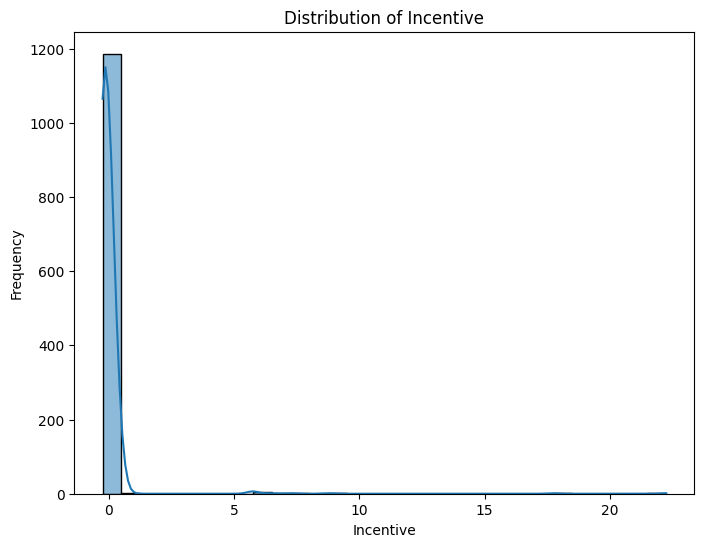

In [ ]:
# Plot the distribution of the incentive feature
plt.figure(figsize=(8, 6))
sns.histplot(data['incentive'], bins=30, kde=True)  # kde=True adds a kernel density estimate line
plt.title('Distribution of Incentive')
plt.xlabel('Incentive')
plt.ylabel('Frequency')
plt.show()


We opted to standardize the incentive feature rather than normalize it because of its high variability and skewed distribution. Normalization scales data to a fixed range, typically [0,1], which is useful when features naturally fall within a bounded interval. However, incentive values vary widely and are not evenly distributed; most values are relatively low, with occasional high values that reflect significant financial incentives. Normalizing this feature would compress its range, causing small differences between values to diminish and making it challenging for the model to detect meaningful variations in incentive levels.

In [ ]:
scaler = StandardScaler()
data['incentive'] = scaler.fit_transform(data[['incentive']])
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,0,1,4,8,0.80,0.450252,0.047631,0.273148,0.373414,0.0,0,0,0.655172,0.940725
1,1/1/2015,0,0,4,1,0.75,0.020132,0.044646,0.037037,-0.238643,0.0,0,0,0.068966,0.886500
2,1/1/2015,0,1,4,11,0.80,0.164731,0.041575,0.141204,0.073631,0.0,0,0,0.321839,0.800570
3,1/1/2015,0,1,4,12,0.80,0.164731,0.041575,0.141204,0.073631,0.0,0,0,0.321839,0.800570
4,1/1/2015,0,1,4,6,0.80,0.445219,0.050314,0.074074,0.073631,0.0,0,0,0.620690,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,1,0,3,10,0.75,0.000000,0.044646,0.037037,-0.238643,0.0,0,0,0.068966,0.628333
1193,3/11/2015,1,0,3,8,0.70,0.019357,0.044646,0.037037,-0.238643,0.0,0,0,0.068966,0.625625
1194,3/11/2015,1,0,3,7,0.65,0.019357,0.044646,0.037037,-0.238643,0.0,0,0,0.068966,0.625625
1195,3/11/2015,1,0,3,9,0.75,0.000000,0.044646,0.069444,-0.238643,0.0,0,0,0.149425,0.505889


This is the view of our data after cleaning and preprocessing it before training

## **Exploratory Data Analysis**

### **Summary Statistics and Data Distributions**

Let's display descriptive statistics to get an understanding of the distribution of each feature.

In [ ]:
# Display basic statistics for numerical features
print(data.describe())


           quarter   department          day         team  \
count  1197.000000  1197.000000  1197.000000  1197.000000   
mean      1.399332     0.577277     3.812865     6.426901   
std       1.215535     0.494199     2.112252     3.463963   
min       0.000000     0.000000     1.000000     1.000000   
25%       0.000000     0.000000     2.000000     3.000000   
50%       1.000000     1.000000     3.000000     6.000000   
75%       2.000000     1.000000     6.000000     9.000000   
max       4.000000     1.000000     7.000000    12.000000   

       targeted_productivity          smv           wip    over_time  \
count            1197.000000  1197.000000   1197.000000  1197.000000   
mean                0.729632     0.235427   1126.437761     0.176214   
std                 0.097891     0.211832   1397.653191     0.129198   
min                 0.070000     0.000000      7.000000     0.000000   
25%                 0.700000     0.020132    970.000000     0.055556   
50%               

The consistent count of **1197** across all features indicates that there are no missing values in the dataset.

`quarter` has a mean of **1.4** which suggests that most records fall between quarter 1 and quarter 2

`department` averages **0.58** where valeus likely represent categories indicating a rougly even split between the two

`day` has a mean of **3.8**, pointing to a slight skew towards later days in the week if values range from 1 to 7.

`no_of_style_change`, `no_of_workers`, and `actual_productivity` have averages of **0.15**, **0.37**, and **0.735**, respectively, suggesting infrequent style changes, a relatively small average number of workers, and productivity that's usually around **73.5%** of the target.

### **Count Plots for Categorical Variables**

To gain a clearer understanding of our categorical variables, let's explore the distribution of each, including `quarter`, `department`, and `day`

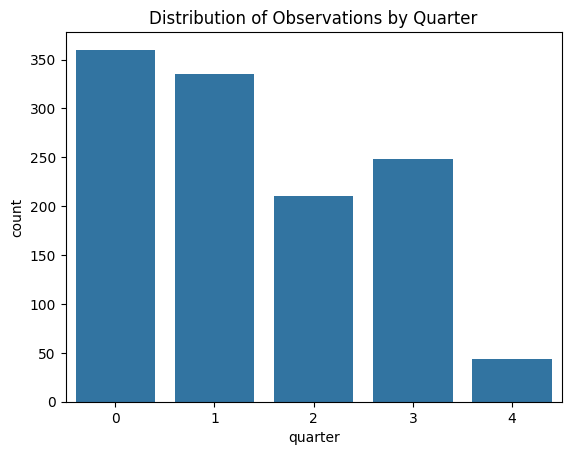

In [ ]:
# Distribution of Feature Quarter
sns.countplot(data=data, x='quarter')
plt.title("Distribution of Observations by Quarter")
plt.show()

From the visualization, we observe that the majority of instances fall within Quarter 1 and Quarter 2

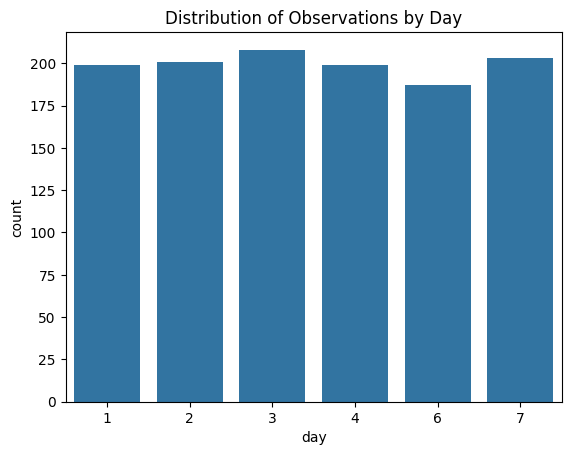

In [ ]:
# Distribution of Feature Quarter
sns.countplot(data=data, x='day')
plt.title("Distribution of Observations by Day")
plt.show()

Using a numerical representation where 1 corresponds to Sunday and 7 corresponds to Saturday, this visualization illustrates that the distribution of instances is nearly uniform across the days of the week. However, there is a notable exception for Fridays, which show no recorded instances.

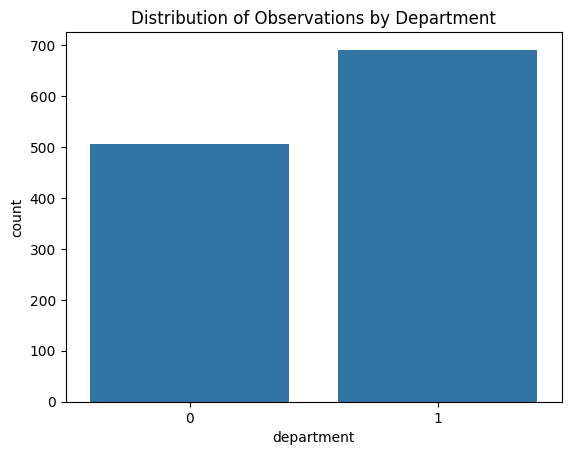

In [ ]:
# Distribution of Feature Quarter
sns.countplot(data=data, x='department')
plt.title("Distribution of Observations by Department")
plt.show()

Lastly, the data indicates that there are significantly more instances in the `sewing` department compared to the `finishing` department.

## **Initial model training**

Separate the X features from the y labels

In [ ]:
X = data.values[:,1:-1]
X

array([[0, 1, 4, ..., 0, 0, 0.6551724137931034],
       [0, 0, 4, ..., 0, 0, 0.06896551724137931],
       [0, 1, 4, ..., 0, 0, 0.32183908045977017],
       ...,
       [1, 0, 3, ..., 0, 0, 0.06896551724137931],
       [1, 0, 3, ..., 0, 0, 0.14942528735632185],
       [1, 0, 3, ..., 0, 0, 0.04597701149425287]], dtype=object)

In [ ]:
y = data.values[:,-1]
y

array([0.940725424, 0.8865, 0.800570492, ..., 0.625625, 0.505888889,
       0.394722222], dtype=object)

Let's separate the training from the test set

We'll set the test size to `0.2` and the `random_state` to 42

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We'll use `SGD Regressor` to train a linear regression model

Instantiate an `SGDRegressor` object. Set the following hyperparameters:
- Initial learning rate: 1-e9
- Maximum iterations: 200
- Penalty: None
- Learning rate: 'constant'
- Random state: 1
- Verbose: 1

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
model = SGDRegressor(eta0=1e-9, penalty=None, max_iter=200, learning_rate='constant', verbose=1, random_state=1)

In [ ]:
model.partial_fit(X_trai, y_kansas)

## **Improving model performance**

## **Error analysis**

## **Model performance summary**

## **Insights and conclusions**

## **References**